In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
imported_data =[]
for i in range(1,32):
    data_frame = pd.read_csv(f'nyt{i}.csv')
    data_frame['Day'] = i
    imported_data.append(data_frame)
data_frame = pd.concat(imported_data, ignore_index=True)

data_frame

,Age,Gender,Impressions,Clicks,Signed_In,Day
0,36,0,3,0,1,1
1,73,1,3,0,1,1
2,30,0,3,0,1,1
3,49,1,3,0,1,1
4,47,1,11,0,1,1
...,...,...,...,...,...,...
14905860,41,1,4,0,1,31
14905861,0,0,5,0,0,31
14905862,22,1,3,0,1,31
14905863,59,0,5,1,1,31


In [40]:
bins = [0, 18, 24, 34, 44, 54, 64, float('inf')]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

data_frame['age_group'] = pd.cut(data_frame['Age'], bins=bins, labels=labels, right=False)

print(data_frame.head())

   Age  Gender  Impressions  Clicks  Signed_In  Day age_group
0   36       0            3       0          1    1     35-44
1   73       1            3       0          1    1       65+
2   30       0            3       0          1    1     25-34
3   49       1            3       0          1    1     45-54
4   47       1           11       0          1    1     45-54


In [41]:
data_frame.loc[data_frame['Gender'] == 1, 'Gender'] = 'Male'
data_frame.loc[data_frame['Gender'] == 0, 'Gender'] = 'Female'
data_frame

,Age,Gender,Impressions,Clicks,Signed_In,Day,age_group
0,36,Female,3,0,1,1,35-44
1,73,Male,3,0,1,1,65+
2,30,Female,3,0,1,1,25-34
3,49,Male,3,0,1,1,45-54
4,47,Male,11,0,1,1,45-54
...,...,...,...,...,...,...,...
14905860,41,Male,4,0,1,31,35-44
14905861,0,Female,5,0,0,31,<18
14905862,22,Male,3,0,1,31,18-24
14905863,59,Female,5,1,1,31,55-64


In [43]:
grouped_data = data_frame.groupby(['age_group','Gender']).agg({'Clicks': 'sum', 'Impressions': 'sum'}).reset_index()
grouped_data['CTR']=grouped_data['Clicks'] / grouped_data['Impressions']

grouped_data

,age_group,Gender,Clicks,Impressions,CTR
0,<18,Female,815692,28716727,0.028405
1,<18,Male,40964,1373095,0.029833
2,18-24,Female,28547,2567289,0.011120
3,18-24,Male,31854,2851414,0.011171
4,25-34,Female,39757,3960583,0.010038
5,25-34,Male,44078,4403825,0.010009
6,35-44,Female,48064,4784496,0.010046
7,35-44,Male,53184,5328839,0.009980
8,45-54,Female,44851,4428835,0.010127
9,45-54,Male,49126,4915835,0.009993


<Figure size 500x300 with 0 Axes>

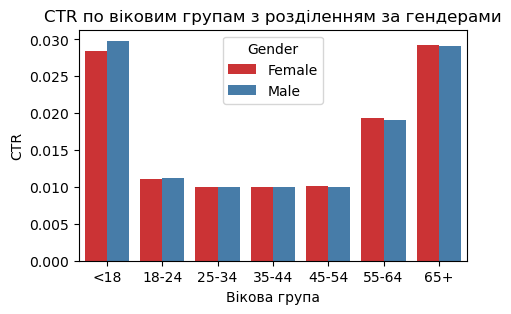

In [46]:
plt.figure(figsize=(5, 3))


plt.figure(figsize=(5, 3))
sns.barplot(x='age_group', y='CTR', hue='Gender', data=grouped_data, palette='Set1')
plt.title('CTR по віковим групам з розділенням за гендерами')
plt.xlabel('Вікова група')
plt.ylabel('CTR')
plt.show()

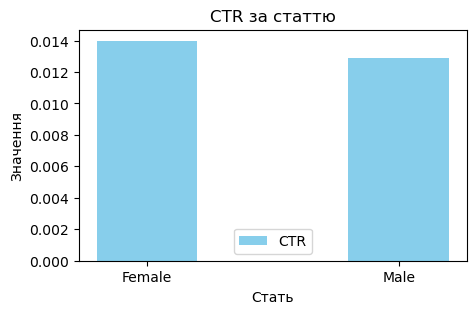

In [48]:
filtered_data = data_frame[data_frame['Age'] > 18]
grouped_data = filtered_data.groupby('Gender').agg({'Clicks': 'sum', 'Impressions': 'sum'}).reset_index()
grouped_data['CTR']=grouped_data['Clicks'] / grouped_data['Impressions']

plt.figure(figsize=(5, 3))
plt.bar(grouped_data['Gender'], grouped_data['CTR'], label='CTR',color='skyblue', width=0.4)

plt.xlabel('Стать')
plt.ylabel('Значення')
plt.title('CTR за статтю')
plt.legend()

plt.show()

In [49]:
grouped_data = data_frame.groupby(['age_group', 'Signed_In'],observed='False').agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
grouped_data['CTR']=grouped_data['Clicks'] / grouped_data['Impressions']

grouped_data

,age_group,Signed_In,Impressions,Clicks,CTR
0,<18,0,28074662,796448,0.028369
1,<18,1,2015160,60208,0.029878
2,18-24,1,5418703,60401,0.011147
3,25-34,1,8364408,83835,0.010023
4,35-44,1,10113335,101248,0.010011
5,45-54,1,9344670,93977,0.010057
6,55-64,1,6650349,127848,0.019224
7,65+,1,4540781,132803,0.029247


In [50]:
filtered_data = data_frame[data_frame['Age'] > 18]
filtered_data
filtered_data = filtered_data[filtered_data['Signed_In'] == 0]
filtered_data

,Age,Gender,Impressions,Clicks,Signed_In,Day,age_group


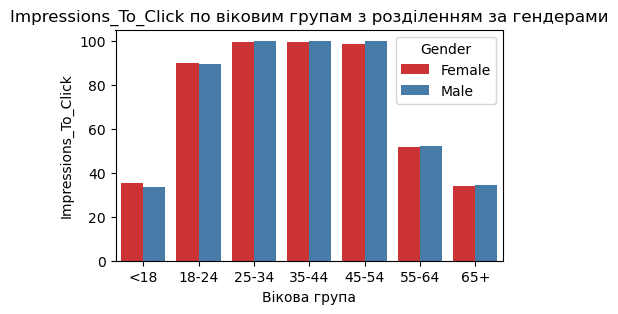

In [51]:
grouped_data = data_frame.groupby(['age_group','Gender']).agg({'Clicks': 'sum', 'Impressions': 'sum'}).reset_index()
grouped_data['Impressions_To_Click']=grouped_data['Impressions'] / grouped_data['Clicks']

# Побудова графіку
plt.figure(figsize=(5, 3))
sns.barplot(x='age_group', y='Impressions_To_Click', hue='Gender', data=grouped_data, palette='Set1')
plt.title('Impressions_To_Click по віковим групам з розділенням за гендерами')
plt.xlabel('Вікова група')
plt.ylabel('Impressions_To_Click')
plt.show()

<Figure size 500x300 with 0 Axes>

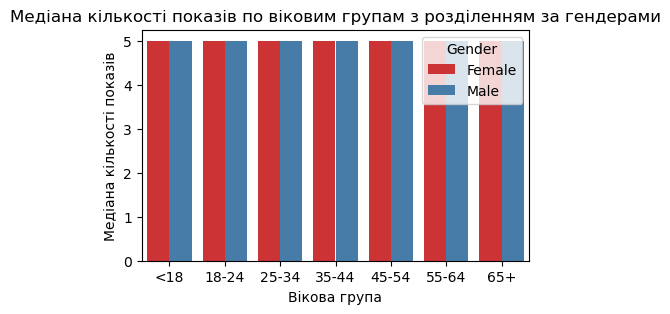

In [52]:
grouped_data = data_frame.groupby(['age_group','Gender'])['Impressions'].median().reset_index()

plt.figure(figsize=(5, 3))
# plt.bar(grouped_data['age_group'], grouped_data['CTR'], label='CTR')

plt.figure(figsize=(5, 3))
sns.barplot(x='age_group', y='Impressions', hue='Gender', data=grouped_data, palette='Set1')
plt.title('Медіана кількості показів по віковим групам з розділенням за гендерами')
plt.xlabel('Вікова група')
plt.ylabel('Медіана кількості показів')
plt.show()

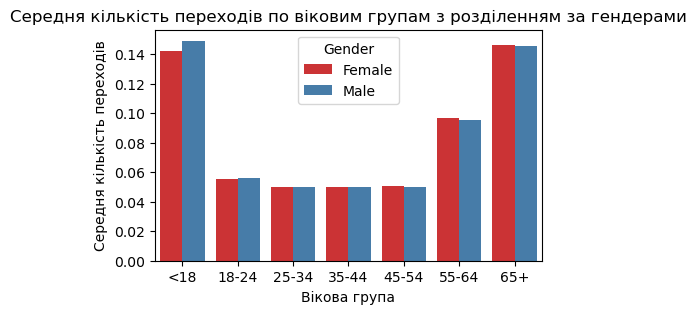

In [53]:
grouped_data = data_frame.groupby(['age_group','Gender'])['Clicks'].mean().reset_index()
# plt.bar(grouped_data['age_group'], grouped_data['CTR'], label='CTR')

plt.figure(figsize=(5, 3))
sns.barplot(x='age_group', y='Clicks', hue='Gender', data=grouped_data, palette='Set1')
plt.title('Середня кількість переходів по віковим групам з розділенням за гендерами')
plt.xlabel('Вікова група')
plt.ylabel('Середня кількість переходів')
plt.show()

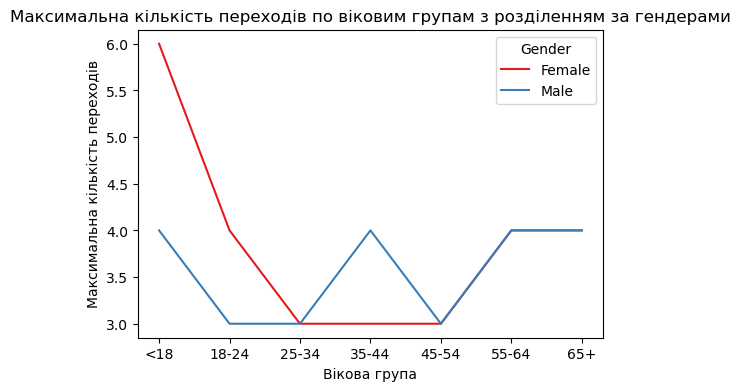

In [20]:
grouped_data = data_frame.groupby(['age_group','Gender'])['Clicks'].max().reset_index()
# Побудова графіку
grouped_data.loc[grouped_data['Gender'] == 1, 'Gender'] = 'Male'
grouped_data.loc[grouped_data['Gender'] == 0, 'Gender'] = 'Female'
# plt.bar(grouped_data['age_group'], grouped_data['CTR'], label='CTR')

plt.figure(figsize=(6, 4))
sns.lineplot(x='age_group', y='Clicks', hue='Gender', data=grouped_data, palette='Set1')
plt.title('Максимальна кількість переходів по віковим групам з розділенням за гендерами')
plt.xlabel('Вікова група')
plt.ylabel('Максимальна кількість переходів')
plt.show()

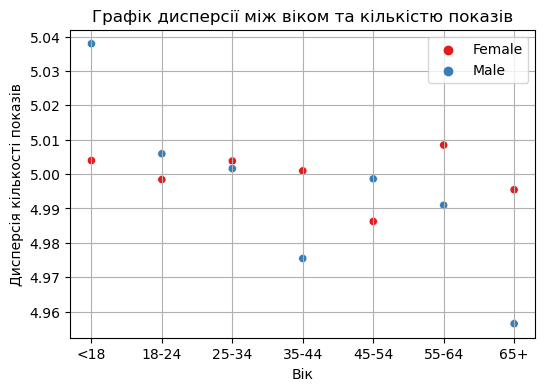

In [54]:
grouped_data = data_frame.groupby(['age_group','Gender'])['Impressions'].var().reset_index(name='dispersion')
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age_group', y='dispersion', hue='Gender', data=grouped_data, palette='Set1')
# sns.scatterplot(grouped_data['age_group'], grouped_data['dispersion'],hue='Gender', color='b', marker='o')
plt.title('Графік дисперсії між віком та кількістю показів')
plt.xlabel('Вік')
plt.ylabel('Дисперсія кількості показів')
plt.legend()
plt.grid(True)
plt.show()

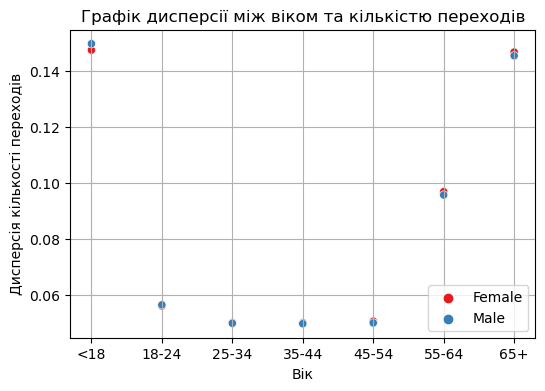

In [55]:
grouped_data = data_frame.groupby(['age_group','Gender'])['Clicks'].var().reset_index(name='dispersion')
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age_group', y='dispersion', hue='Gender', data=grouped_data, palette='Set1')
# sns.scatterplot(grouped_data['age_group'], grouped_data['dispersion'],hue='Gender', color='b', marker='o')
plt.title('Графік дисперсії між віком та кількістю переходів')
plt.xlabel('Вік')
plt.ylabel('Дисперсія кількості переходів')
plt.legend()
plt.grid(True)
plt.show()

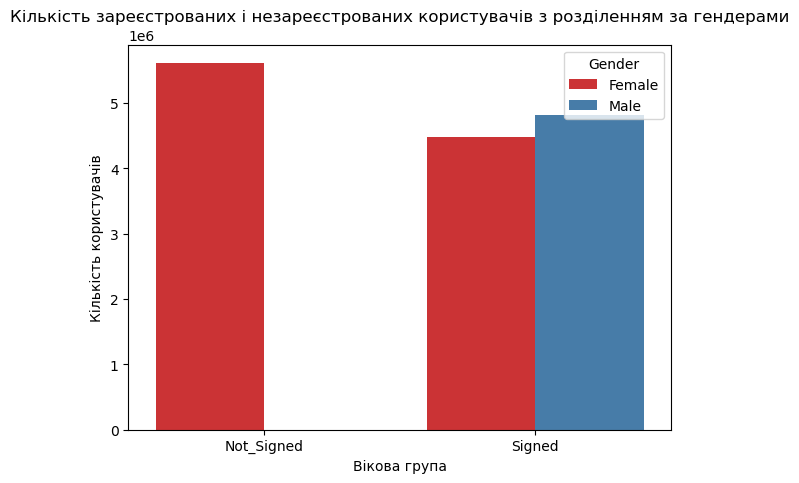

In [56]:
grouped_data = data_frame.groupby(['Gender','Signed_In'],observed='False').size().reset_index(name='Count')

grouped_data.loc[grouped_data['Signed_In'] == 1, 'Signed_In'] = 'Signed'
grouped_data.loc[grouped_data['Signed_In'] == 0, 'Signed_In'] = 'Not_Signed'

plt.figure(figsize=(7, 5))
sns.barplot(x='Signed_In', y='Count', hue='Gender', data=grouped_data, palette='Set1')
plt.title('Кількість зареєстрованих і незареєстрованих користувачів з розділенням за гендерами')
plt.xlabel('Вікова група')
plt.ylabel('Кількість користувачів')
plt.show()

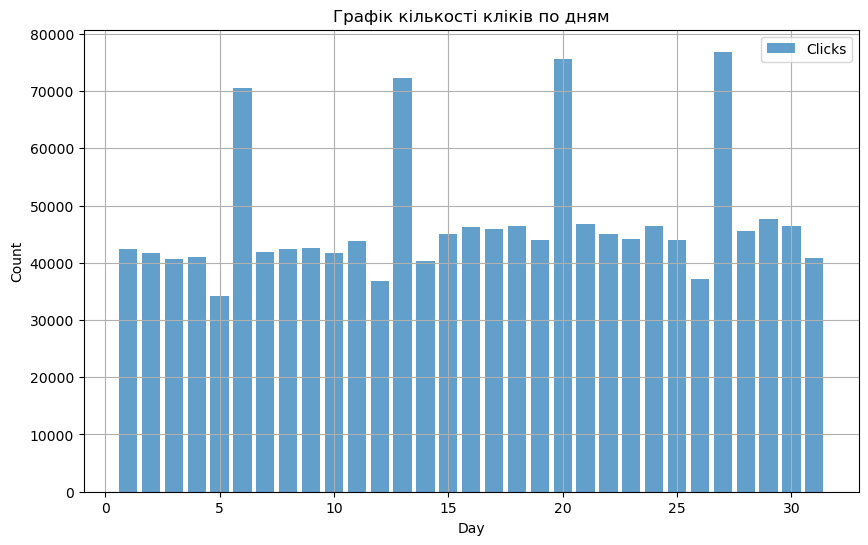

In [26]:
grouped_data = data_frame.groupby('Day').agg({'Clicks': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Day'], grouped_data['Clicks'], label='Clicks', alpha=0.7)

plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Графік кількості кліків по дням')
plt.legend()
plt.grid(True)
plt.show()

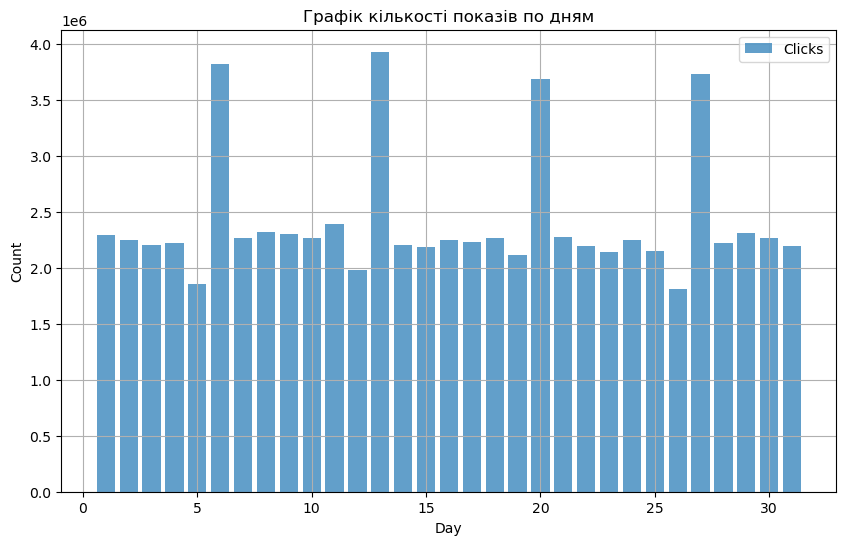

In [57]:
grouped_data = data_frame.groupby('Day').agg({'Impressions': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Day'], grouped_data['Impressions'], label='Clicks', alpha=0.7)

plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Графік кількості показів по дням')
plt.legend()
plt.grid(True)
plt.show()

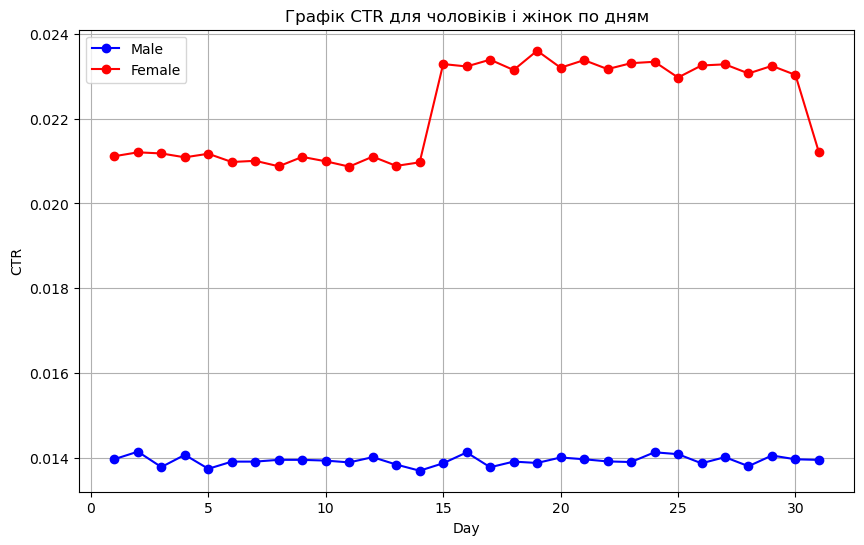

In [58]:
grouped_data = data_frame.groupby(['Day', 'Gender']).agg({'Impressions': 'sum', 'Clicks': 'sum'}).reset_index()
grouped_data['CTR'] = grouped_data['Clicks'] / grouped_data['Impressions']
male_data = grouped_data[grouped_data['Gender'] == 'Male']
female_data = grouped_data[grouped_data['Gender'] == 'Female']

plt.figure(figsize=(10, 6))
plt.plot(male_data['Day'], male_data['CTR'], marker='o', linestyle='-', color='blue', label='Male')
plt.plot(female_data['Day'], female_data['CTR'], marker='o', linestyle='-', color='red', label='Female')

plt.xlabel('Day')
plt.ylabel('CTR')
plt.title('Графік CTR для чоловіків і жінок по дням')
plt.legend()
plt.grid(True)
plt.show()